In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from copy import copy

In [2]:
#np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [3]:
import matcomp_algorithms as mca

In [4]:
np.random.seed(18)
N = 7
A = np.random.rand(N,N)# + np.identity(N)
#A = A.T + A
H = A.copy()

In [5]:
mca.upper_Hessen_House(H)

In [6]:
U0 = mca.U0_from_upper_Hessen_House(H)

In [7]:
H = np.triu(H, k=-1)

In [8]:
A_retrieved = np.linalg.multi_dot([U0, H, U0.T])

In [9]:
np.allclose(A, A_retrieved)

True

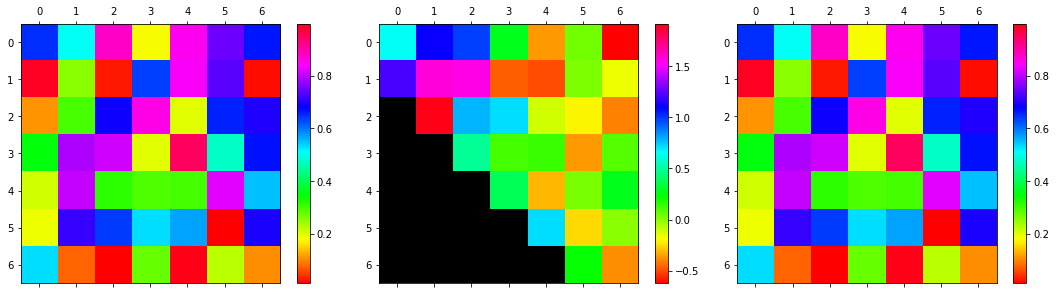

In [10]:
tol = 1e-15

#cmap = plt.cm.hsv
cmap = copy(mpl.cm.get_cmap("hsv"))
cmap.set_bad(color='black')

plt.figure(figsize=(15,4))

plt.subplot(131)
A_masked = np.ma.masked_where(np.abs(A) < tol, A)
plt.matshow(A_masked, fignum=0, cmap=cmap)
plt.colorbar()

plt.subplot(132)
H_masked = np.ma.masked_where(np.abs(H) < tol, H)
plt.matshow(H_masked, fignum=0, cmap=cmap)
plt.colorbar()

plt.subplot(133)
A_retrieved_masked = np.ma.masked_where(np.abs(A_retrieved) < tol, A_retrieved)
plt.matshow(A_retrieved_masked, fignum=0, cmap=cmap)
plt.colorbar()

plt.tight_layout()
plt.show()

In [11]:
R = H.copy()

In [12]:
mca.QR_Givens(R)
#mca.QR_House(R)

In [13]:
Q = mca.Q_from_QR_Givens(R)
#Q = mca.Q_from_QR_House(R)

In [14]:
R = np.triu(R)

In [15]:
H_retrieved = Q@R

In [16]:
np.allclose(H, H_retrieved)

True

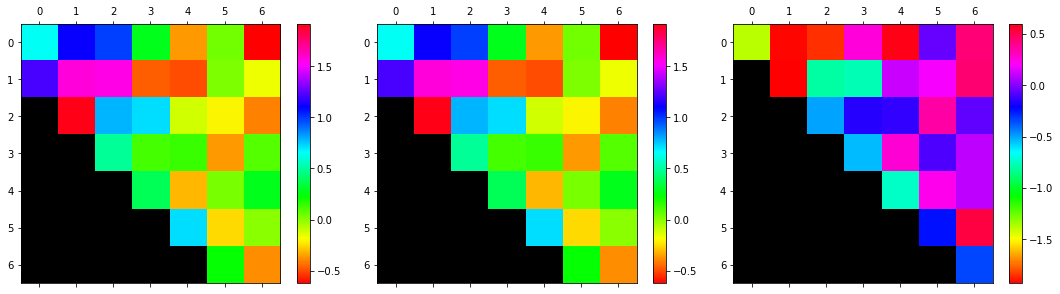

In [17]:
tol = 1e-15

cmap = copy(mpl.cm.get_cmap("hsv"))
cmap.set_bad(color='black')

plt.figure(figsize=(15,4))

plt.subplot(131)
H_masked = np.ma.masked_where(np.abs(H) < tol, H)
plt.matshow(H_masked, fignum=0, cmap=cmap)
plt.colorbar()

plt.subplot(132)
H_retrieved_masked = np.ma.masked_where(np.abs(H_retrieved) < tol, H_retrieved)
plt.matshow(H_retrieved_masked, fignum=0, cmap=cmap)
plt.colorbar()

plt.subplot(133)
R_masked = np.ma.masked_where(np.abs(R) < tol, R)
plt.matshow(R_masked, fignum=0, cmap=cmap)
plt.colorbar()

plt.tight_layout()
plt.show()

In [18]:
H_plus = H.copy()

In [19]:
mca.H_plus_RQ(H_plus)

In [20]:
np.allclose(H_plus, R@Q)

True